In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Wczytywanie danych i czytanie dokumentacji
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
data = fetch_olivetti_faces()

In [4]:
data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
print(data['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

## 0. Wyświetlanie obrazów

In [6]:
import matplotlib.pyplot as plt

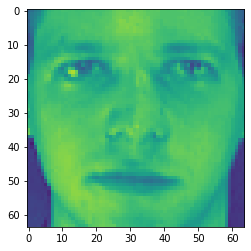

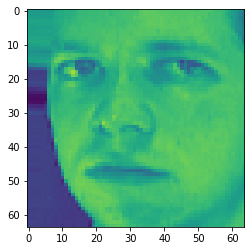

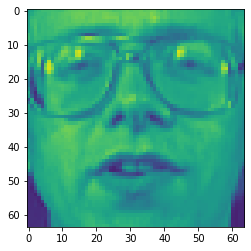

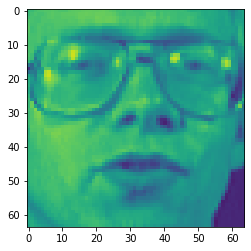

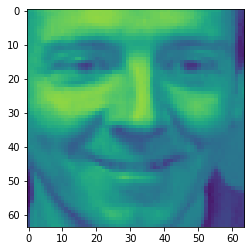

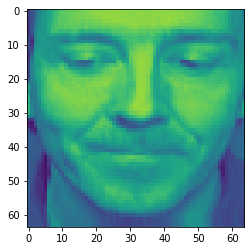

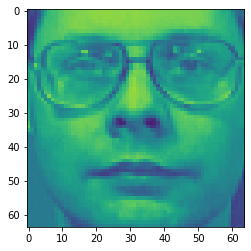

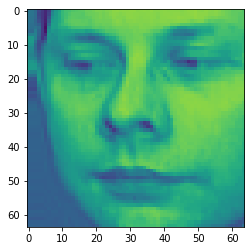

In [7]:
for i in range(0, 40, 5):
    plt.imshow(data['images'][i,:,:], interpolation='none', aspect=1, vmin=0, vmax=1)
    plt.show()

## 1. Algorytm PCA do kompresji zbioru Olivetti Faces

In [8]:
from sklearn.decomposition import PCA

Sprawdźmy, dla ilu komponentów wariancja jest większa niż 95%

In [9]:
pca = PCA(n_components=0.95)
pca.fit(data['data'])

PCA(n_components=0.95)

In [10]:
reduced = pca.transform(data['data'])

In [11]:
reduced.shape

(400, 123)

Więc 123 komponenty są wystarczające.
Policzmy CR.

In [12]:
print(len(data['data'][0]) / len(reduced[0]))

33.300813008130085


Więc |CR| = 33.3

## 2. Transformacja odwrotna

In [13]:
decompressed = pca.inverse_transform(reduced)

In [14]:
decompressed.shape

(400, 4096)

Więc rzeczywiście działa.

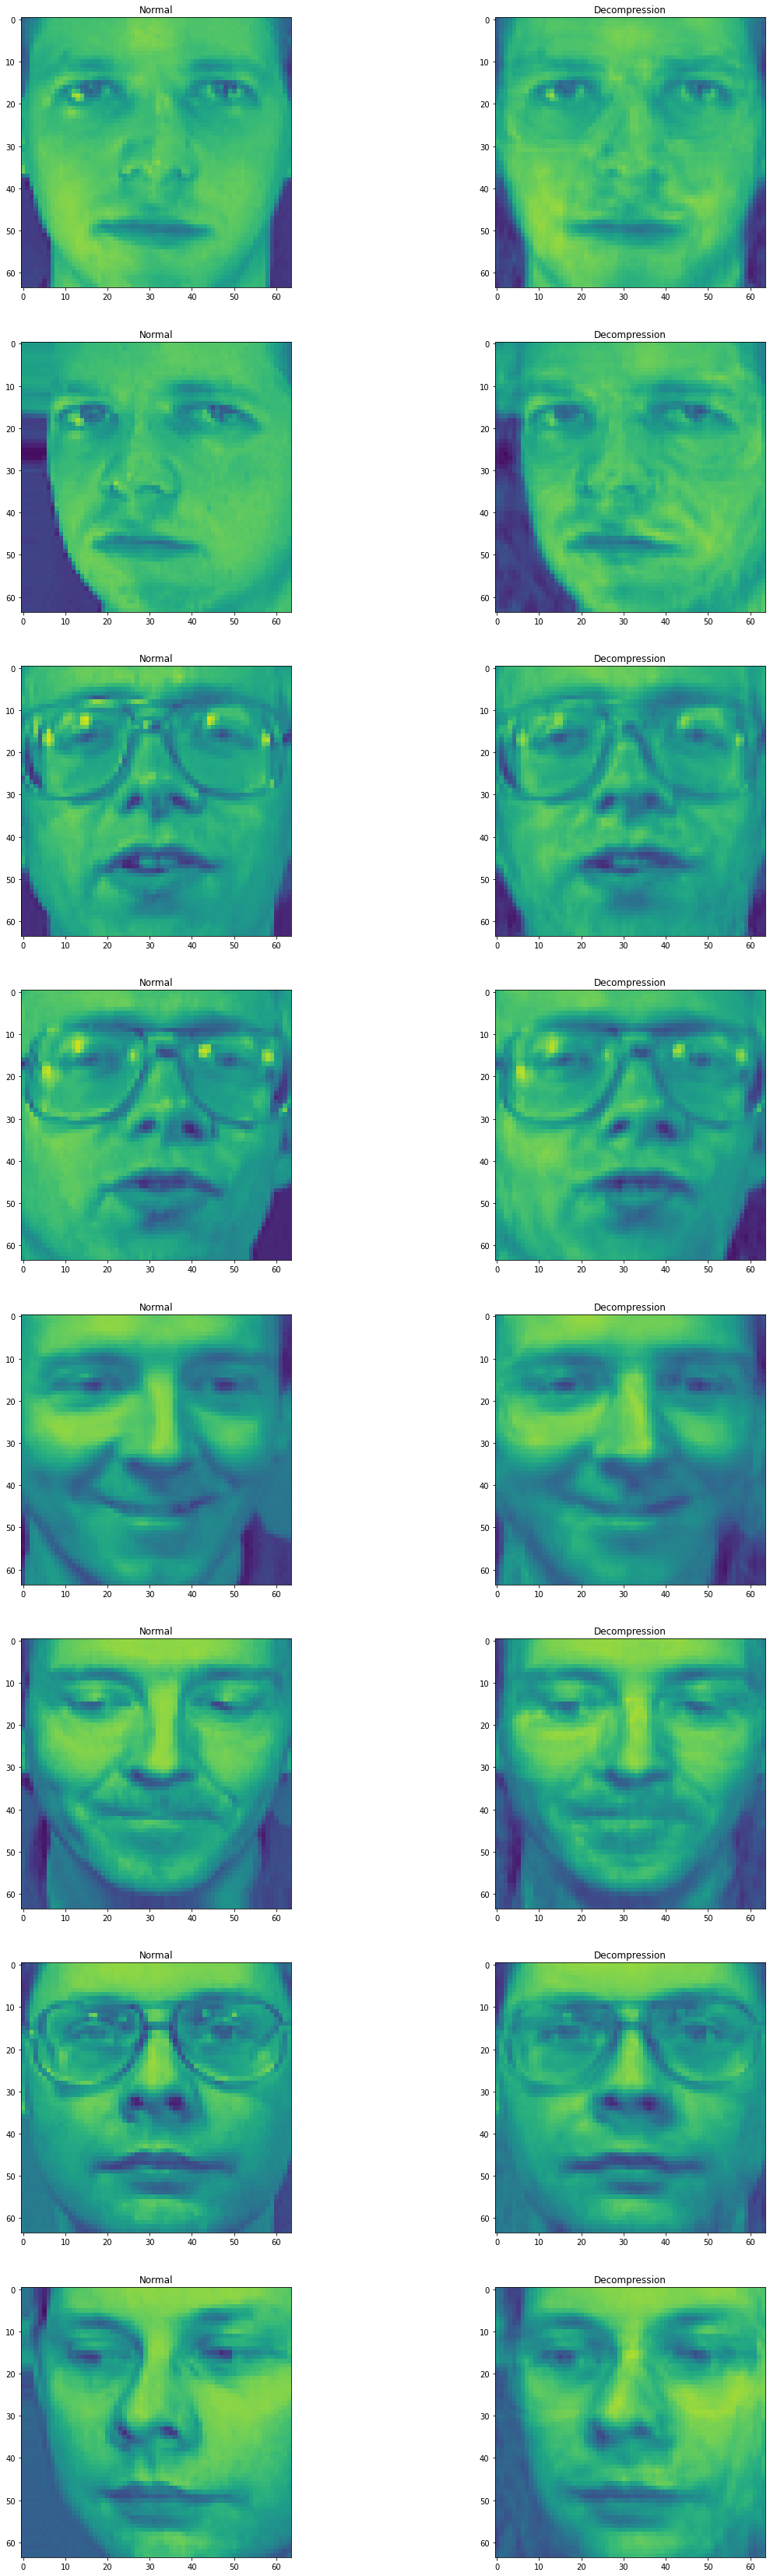

In [15]:
plt.figure(figsize=(20,60))
for i in range(0, 40, 5):
    ax1 = plt.subplot(8, 2, i / 5 * 2 + 1)
    ax1.imshow(data['images'][i], interpolation='none', aspect=1, vmin=0, vmax=1)
    ax1.set_title("Normal")
    
    decompressedData = decompressed[i].reshape(64, 64)
    ax2 = plt.subplot(8, 2, i / 5 * 2 + 2)
    ax2.imshow(decompressedData, interpolation='none', aspect=1, vmin=0, vmax=1)
    ax2.set_title("Decompression")
plt.show()

Widać różnicę pomiędzy twarzami, lecz nie są one znaczące dla ludzkiego (mojego) oka.

### RMSE

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
rmse = []
for og, d in zip(data['data'], decompressed):
    rmse.append(mean_squared_error(og, d, squared=False))

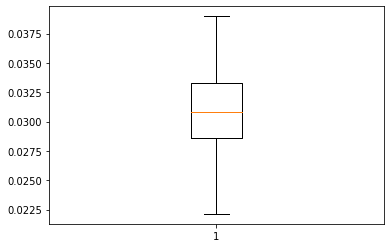

In [18]:
plt.boxplot(rmse)
plt.show()

In [19]:
np.average(rmse)

0.030736294

## 3.  Zmodyfikowane obrazy

### Obroty

In [80]:
rot90 = []
for i in range(400):
    rot90.append(np.rot90(data['images'][i]))

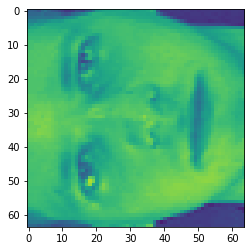

In [61]:
plt.imshow(rot90[0], interpolation='none', aspect=1, vmin=0, vmax=1)
plt.show()

In [66]:
rot180 = []
for i in range(400):
    rot180.append(np.flip(data['images'][i]))

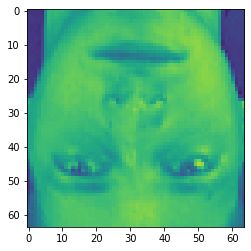

In [67]:
plt.imshow(rot180[0], interpolation='none', aspect=1, vmin=0, vmax=1)
plt.show()

### Rozjaśnianie/pociemnianie

In [104]:
lightened = []
for i in range(400):
    lightened.append(np.clip(data['images'][i]+0.25, 0, 1))

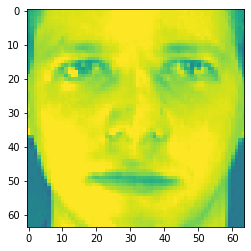

In [105]:
plt.imshow(lightened[0], interpolation='none', aspect=1, vmin=0, vmax=1)
plt.show()

In [106]:
darkened = []
for i in range(400):
    darkened.append(np.clip(data['images'][i]-0.25, 0, 1))

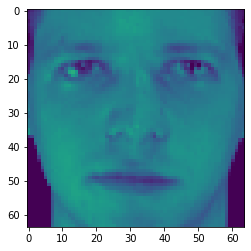

In [108]:
plt.imshow(darkened[0], interpolation='none', aspect=1, vmin=0, vmax=1)
plt.show()

## 4. Transformacje

In [109]:
rot90 = np.array(rot90)
rot90 = rot90.reshape(400, 4096)
rot180 = np.array(rot180)
rot180 = rot180.reshape(400, 4096)
lightened = np.array(lightened)
lightened = lightened.reshape(400, 4096)
darkened = np.array(darkened)
darkened = darkened.reshape(400, 4096)

In [94]:
def cal_rmse(original):
    reduced = pca.transform(original)
    decompressed = pca.inverse_transform(reduced)
    rmse = []
    for og, d in zip(original, decompressed):
        rmse.append(mean_squared_error(og, d, squared=False))
    return rmse

In [112]:
np.average(cal_rmse(rot90))

0.09117375

In [113]:
np.average(cal_rmse(rot180))

0.08889342

In [114]:
np.average(cal_rmse(lightened))

0.03638268

In [115]:
np.average(cal_rmse(darkened))

0.03498363

## 5. Czy PCA jest dobre do wykrywania anomalii?

Dla przypomnienia, średnia RMSE wynosiła 0.3, dla oryginalnego zdjęcia-zdjęcie z kompresją i dekompresją. Widać więc, że wyniki dla rozjaśnień/zaciemniej nie zmieniają zbytnio RMSE, a więc PCA nie powinno być dobre do wykrywania tych anomalii. Natomiast, dla obrotów RMSE wzrósł prawie 3-krotnie, więc dużą skuteczność może mieć PCA do wykrywania anomalii tego typu.